## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  12.431568   698.899568  0.642587  2.731407  449.241461
1  46.321517   889.257495  0.705016  4.412250  628.645762
2  28.618820  1361.398308  0.702529  9.308578  956.921263
3  24.510564   855.368742  0.528787  6.057463  453.008599
4  84.494814   261.288713  0.351754  4.019813  124.788880


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9065119	total: 58ms	remaining: 57.9s
1:	learn: 0.8950726	total: 58.4ms	remaining: 29.2s
2:	learn: 0.8866263	total: 58.9ms	remaining: 19.6s
3:	learn: 0.8752066	total: 59.4ms	remaining: 14.8s
4:	learn: 0.8613408	total: 59.7ms	remaining: 11.9s
5:	learn: 0.8497301	total: 60.2ms	remaining: 9.97s
6:	learn: 0.8400365	total: 60.6ms	remaining: 8.59s
7:	learn: 0.8311048	total: 61.1ms	remaining: 7.57s
8:	learn: 0.8221254	total: 61.5ms	remaining: 6.78s
9:	learn: 0.8097165	total: 62ms	remaining: 6.14s
10:	learn: 0.8001440	total: 62.4ms	remaining: 5.61s
11:	learn: 0.7893794	total: 62.8ms	remaining: 5.17s
12:	learn: 0.7779435	total: 63.3ms	remaining: 4.8s
13:	learn: 0.7674816	total: 63.7ms	remaining: 4.49s
14:	learn: 0.7574717	total: 64.2ms	remaining: 4.21s
15:	learn: 0.7492778	total: 64.6ms	remaining: 3.97s
16:	learn: 0.7384211	total: 65.1ms	remaining: 3.77s
17:	learn: 0.7311874	total: 65.6ms	remaining: 3.58s
18:	learn: 0.7240829	total: 66ms	remaining: 3.41s

95:	learn: 0.3041419	total: 101ms	remaining: 950ms
96:	learn: 0.3010075	total: 102ms	remaining: 945ms
97:	learn: 0.2981978	total: 102ms	remaining: 938ms
98:	learn: 0.2950401	total: 102ms	remaining: 931ms
99:	learn: 0.2924100	total: 103ms	remaining: 924ms
100:	learn: 0.2893629	total: 103ms	remaining: 917ms
101:	learn: 0.2860928	total: 104ms	remaining: 912ms
102:	learn: 0.2828723	total: 104ms	remaining: 905ms
103:	learn: 0.2799889	total: 104ms	remaining: 900ms
104:	learn: 0.2771845	total: 105ms	remaining: 895ms
105:	learn: 0.2747213	total: 106ms	remaining: 890ms
106:	learn: 0.2713780	total: 106ms	remaining: 885ms
107:	learn: 0.2682119	total: 107ms	remaining: 880ms
108:	learn: 0.2652492	total: 107ms	remaining: 875ms
109:	learn: 0.2627549	total: 108ms	remaining: 871ms
110:	learn: 0.2604200	total: 108ms	remaining: 866ms
111:	learn: 0.2582094	total: 109ms	remaining: 861ms
112:	learn: 0.2558752	total: 109ms	remaining: 856ms
113:	learn: 0.2531799	total: 110ms	remaining: 852ms
114:	learn: 0.250

270:	learn: 0.0599205	total: 186ms	remaining: 501ms
271:	learn: 0.0594934	total: 187ms	remaining: 500ms
272:	learn: 0.0590491	total: 187ms	remaining: 499ms
273:	learn: 0.0585809	total: 188ms	remaining: 497ms
274:	learn: 0.0581322	total: 188ms	remaining: 496ms
275:	learn: 0.0576648	total: 188ms	remaining: 494ms
276:	learn: 0.0572360	total: 189ms	remaining: 493ms
277:	learn: 0.0568258	total: 189ms	remaining: 492ms
278:	learn: 0.0564104	total: 190ms	remaining: 490ms
279:	learn: 0.0559920	total: 190ms	remaining: 489ms
280:	learn: 0.0555790	total: 191ms	remaining: 488ms
281:	learn: 0.0551825	total: 191ms	remaining: 487ms
282:	learn: 0.0547977	total: 192ms	remaining: 486ms
283:	learn: 0.0542682	total: 192ms	remaining: 485ms
284:	learn: 0.0538910	total: 193ms	remaining: 483ms
285:	learn: 0.0535095	total: 193ms	remaining: 482ms
286:	learn: 0.0530936	total: 194ms	remaining: 481ms
287:	learn: 0.0527166	total: 194ms	remaining: 480ms
288:	learn: 0.0523577	total: 194ms	remaining: 478ms
289:	learn: 

475:	learn: 0.0161992	total: 282ms	remaining: 310ms
476:	learn: 0.0161149	total: 282ms	remaining: 310ms
477:	learn: 0.0160385	total: 283ms	remaining: 309ms
478:	learn: 0.0159564	total: 283ms	remaining: 308ms
479:	learn: 0.0158762	total: 284ms	remaining: 307ms
480:	learn: 0.0158106	total: 284ms	remaining: 306ms
481:	learn: 0.0157324	total: 284ms	remaining: 306ms
482:	learn: 0.0156454	total: 285ms	remaining: 305ms
483:	learn: 0.0155520	total: 285ms	remaining: 304ms
484:	learn: 0.0154482	total: 286ms	remaining: 303ms
485:	learn: 0.0153770	total: 286ms	remaining: 303ms
486:	learn: 0.0153256	total: 287ms	remaining: 302ms
487:	learn: 0.0152574	total: 287ms	remaining: 301ms
488:	learn: 0.0151800	total: 287ms	remaining: 300ms
489:	learn: 0.0150914	total: 288ms	remaining: 299ms
490:	learn: 0.0150063	total: 288ms	remaining: 299ms
491:	learn: 0.0149579	total: 289ms	remaining: 298ms
492:	learn: 0.0149106	total: 289ms	remaining: 297ms
493:	learn: 0.0148377	total: 290ms	remaining: 297ms
494:	learn: 

673:	learn: 0.0080293	total: 365ms	remaining: 177ms
674:	learn: 0.0079948	total: 366ms	remaining: 176ms
675:	learn: 0.0079807	total: 366ms	remaining: 176ms
676:	learn: 0.0079559	total: 367ms	remaining: 175ms
677:	learn: 0.0079420	total: 367ms	remaining: 174ms
678:	learn: 0.0079337	total: 367ms	remaining: 174ms
679:	learn: 0.0079094	total: 368ms	remaining: 173ms
680:	learn: 0.0078957	total: 368ms	remaining: 173ms
681:	learn: 0.0078660	total: 369ms	remaining: 172ms
682:	learn: 0.0078516	total: 369ms	remaining: 171ms
683:	learn: 0.0078462	total: 370ms	remaining: 171ms
684:	learn: 0.0078135	total: 370ms	remaining: 170ms
685:	learn: 0.0078082	total: 370ms	remaining: 170ms
686:	learn: 0.0078029	total: 371ms	remaining: 169ms
687:	learn: 0.0077790	total: 371ms	remaining: 168ms
688:	learn: 0.0077737	total: 372ms	remaining: 168ms
689:	learn: 0.0077435	total: 372ms	remaining: 167ms
690:	learn: 0.0077200	total: 372ms	remaining: 166ms
691:	learn: 0.0076917	total: 373ms	remaining: 166ms
692:	learn: 

885:	learn: 0.0046321	total: 460ms	remaining: 59.2ms
886:	learn: 0.0046073	total: 461ms	remaining: 58.7ms
887:	learn: 0.0045962	total: 461ms	remaining: 58.2ms
888:	learn: 0.0045752	total: 462ms	remaining: 57.6ms
889:	learn: 0.0045673	total: 462ms	remaining: 57.1ms
890:	learn: 0.0045433	total: 462ms	remaining: 56.6ms
891:	learn: 0.0045331	total: 463ms	remaining: 56ms
892:	learn: 0.0045246	total: 463ms	remaining: 55.5ms
893:	learn: 0.0045168	total: 464ms	remaining: 55ms
894:	learn: 0.0045068	total: 464ms	remaining: 54.4ms
895:	learn: 0.0044962	total: 464ms	remaining: 53.9ms
896:	learn: 0.0044727	total: 465ms	remaining: 53.4ms
897:	learn: 0.0044629	total: 465ms	remaining: 52.9ms
898:	learn: 0.0044414	total: 466ms	remaining: 52.3ms
899:	learn: 0.0044186	total: 466ms	remaining: 51.8ms
900:	learn: 0.0044096	total: 467ms	remaining: 51.3ms
901:	learn: 0.0044019	total: 467ms	remaining: 50.7ms
902:	learn: 0.0043931	total: 467ms	remaining: 50.2ms
903:	learn: 0.0043835	total: 468ms	remaining: 49.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

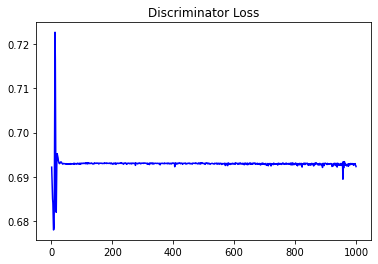

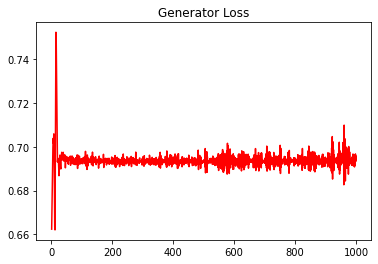

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08391980229882473


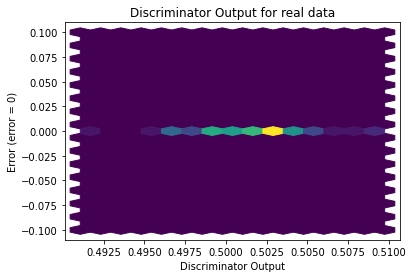

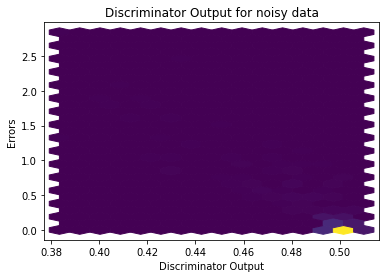

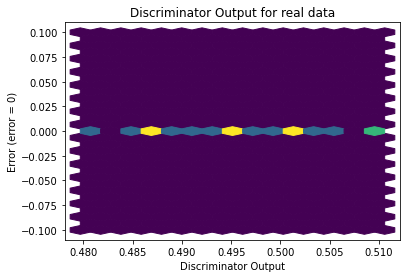

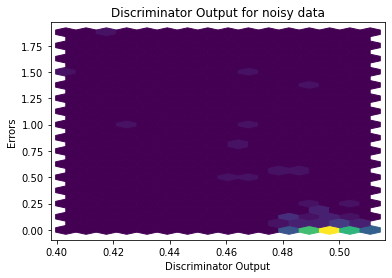

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


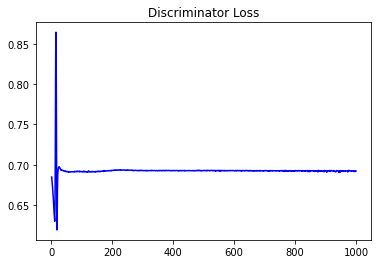

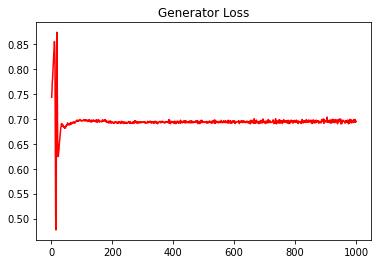

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08429992936380558


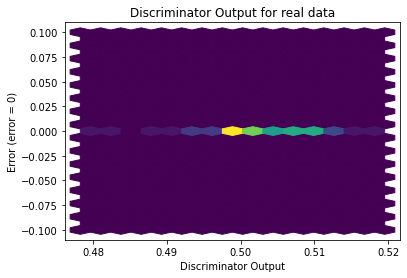

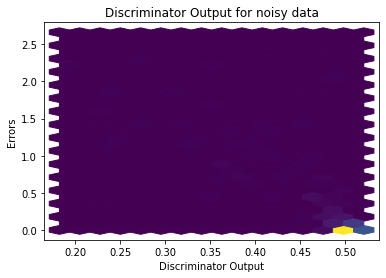

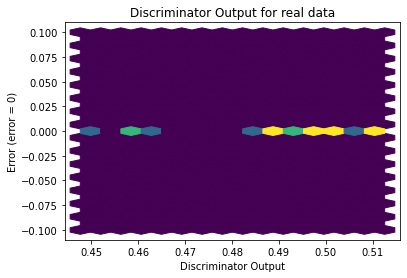

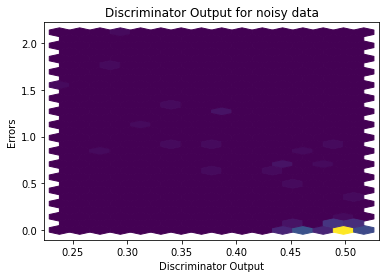

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0728]], requires_grad=True)
